In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
%matplotlib inline

In [31]:
ipl_data = pd.read_csv('C:/Users/prathik/Documents/Data Science Super Specialization/IPL 2017 - Adv Report v1.csv')
ipl_data.head(5)

,﻿Channel,Date,Start Time {Av(Tm)},End Time {Av(Tm)},Month,Length [sec] {Av},Description,Ev. Type,Brand,Sector,Category,Advertiser,Impressions´000 {Av(Wg)},Rate/10 Sec,Cost
0,Sony MAX,05/04/2017,06:34:47 PM,06:35:02 PM,4,15,OPPO F3 PLUS,Commercial,OPPO F3 PLUS,Telecom Products,CELLULAR PHONES-SMART PHONES,OPPO INDIA,"2,463.19","200,000","300,000"
1,Sony MAX,05/04/2017,06:35:02 PM,06:35:12 PM,4,10,YAMAHA FZ 25,Commercial,YAMAHA FZ 25,Auto,AUTO-TWO WHEELERS,YAMAHA MOTOR INDIA PVT LTD,"2,006.82","200,000","200,000"
2,Sony MAX,05/04/2017,06:35:12 PM,06:35:42 PM,4,30,JIO DIGITAL LIFE,Commercial,JIO DIGITAL LIFE,Telecom/Internet Service Providers,CELLULAR PHONE SERVICE,RELIANCE JIO INFOCOMM LTD,"2,006.82","200,000","600,000"
3,Sony MAX,05/04/2017,06:35:42 PM,06:36:12 PM,4,30,AMUL ICE CREAM,Commercial,AMUL ICE CREAM,Food & Beverages,ICE CREAM/FROZEN DESSERTS,GCMMF (GUJ COOP MILK MKT FED),"1,966.16","200,000","600,000"
4,Sony MAX,05/04/2017,06:36:12 PM,06:36:27 PM,4,15,OPPO F3 PLUS,Commercial,OPPO F3 PLUS,Telecom Products,CELLULAR PHONES-SMART PHONES,OPPO INDIA,"1,905.15","200,000","300,000"


In [32]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58924 entries, 0 to 58923
Data columns (total 15 columns):
﻿Channel                    58924 non-null object
Date                        58924 non-null object
Start Time {Av(Tm)}         58924 non-null object
End Time {Av(Tm)}           58924 non-null object
Month                       58924 non-null int64
Length [sec] {Av}           58924 non-null int64
Description                 58924 non-null object
Ev. Type                    58924 non-null object
Brand                       58924 non-null object
Sector                      58924 non-null object
Category                    58924 non-null object
Advertiser                  58924 non-null object
Impressions´000 {Av(Wg)}    58924 non-null object
Rate/10 Sec                 58924 non-null object
Cost                        58924 non-null object
dtypes: int64(2), object(13)
memory usage: 6.7+ MB


In [33]:
ipl_data.index = pd.to_datetime(ipl_data['Date'])
ipl_data['Cost'] = ipl_data['Cost'].str.replace(',',"")
ipl_data["Impressions´000 {Av(Wg)}"] = ipl_data["Impressions´000 {Av(Wg)}"].str.replace(',',"")
ipl_data['Rate/10 Sec'] = ipl_data['Rate/10 Sec'].str.replace(',',"")
ipl_data["Impressions´000 {Av(Wg)}"] = ipl_data["Impressions´000 {Av(Wg)}"].astype('float64')
ipl_data['Rate/10 Sec'] = ipl_data['Rate/10 Sec'].astype(int)
ipl_data['Cost'] = ipl_data['Cost'].astype(int)
ipl_data.head(5)

,﻿Channel,Date,Start Time {Av(Tm)},End Time {Av(Tm)},Month,Length [sec] {Av},Description,Ev. Type,Brand,Sector,Category,Advertiser,Impressions´000 {Av(Wg)},Rate/10 Sec,Cost
Date,,,,,,,,,,,,,,,
2017-05-04,Sony MAX,05/04/2017,06:34:47 PM,06:35:02 PM,4,15,OPPO F3 PLUS,Commercial,OPPO F3 PLUS,Telecom Products,CELLULAR PHONES-SMART PHONES,OPPO INDIA,2463.19,200000,300000
2017-05-04,Sony MAX,05/04/2017,06:35:02 PM,06:35:12 PM,4,10,YAMAHA FZ 25,Commercial,YAMAHA FZ 25,Auto,AUTO-TWO WHEELERS,YAMAHA MOTOR INDIA PVT LTD,2006.82,200000,200000
2017-05-04,Sony MAX,05/04/2017,06:35:12 PM,06:35:42 PM,4,30,JIO DIGITAL LIFE,Commercial,JIO DIGITAL LIFE,Telecom/Internet Service Providers,CELLULAR PHONE SERVICE,RELIANCE JIO INFOCOMM LTD,2006.82,200000,600000
2017-05-04,Sony MAX,05/04/2017,06:35:42 PM,06:36:12 PM,4,30,AMUL ICE CREAM,Commercial,AMUL ICE CREAM,Food & Beverages,ICE CREAM/FROZEN DESSERTS,GCMMF (GUJ COOP MILK MKT FED),1966.16,200000,600000
2017-05-04,Sony MAX,05/04/2017,06:36:12 PM,06:36:27 PM,4,15,OPPO F3 PLUS,Commercial,OPPO F3 PLUS,Telecom Products,CELLULAR PHONES-SMART PHONES,OPPO INDIA,1905.15,200000,300000


In [35]:
ipl_data.columns[12]

'Impressions´000 {Av(Wg)}'

In [36]:
names=ipl_data.columns.tolist()
names[names.index('Impressions´000 {Av(Wg)}')]='Impressions'
ipl_data.columns=names
categorywise_data=ipl_data.groupby('Category').Impressions.mean()
categorywise_data.sort_values(ascending=False).head(10)

Category
TRAVEL & TOURISM             13260.870000
SHAVING SYSTEM/RAZOR          7782.741419
FOOTWEAR                      7519.209965
SUITINGS                      6579.834037
PAINTS                        6427.598038
LIGHTING PRODUCTS             6232.779704
FANS                          5232.157967
PROPERTIES/REAL ESTATES       4768.112248
AUTO-TWO WHEELERS             4736.939344
ELECTRICAL SWITCHES/PARTS     4710.872556
Name: Impressions, dtype: float64

In [37]:
names=ipl_data.columns.tolist()
names[names.index('\ufeffChannel')]='Channel'
ipl_data.columns=names
ipl_data.columns[0]


'Channel'

In [38]:
Channel_data=ipl_data.groupby("Channel").Impressions.mean()
Channel_data

Channel
Sony MAX       6831.787749
Sony SIX HD      79.919189
Sony SIX(v)    2355.721386
Name: Impressions, dtype: float64

In [39]:
labels='Sony Max','Sony Six HD','Sony Six (V)'
explode=(0.2,0.4,0.1)

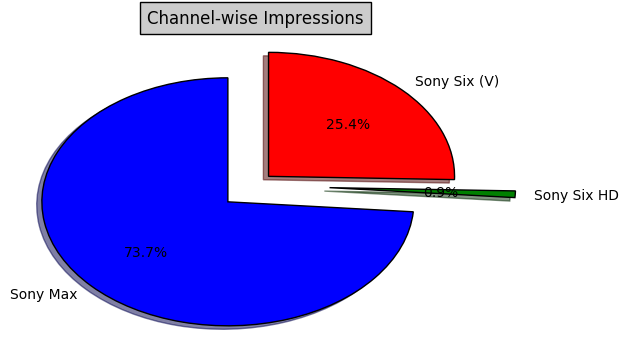

In [395]:

plt.pie(Channel_data, labels=labels, explode=explode , autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Channel-wise Impressions', bbox={'facecolor':'0.8', 'pad':5})


plt.show()

In [396]:
impressions_by_sector_across_channels_table = pd.pivot_table(ipl_data, values='Impressions', index=['Channel'],columns=['Sector'], aggfunc=np.median)
round(impressions_by_sector_across_channels_table,2)

Sector,Alcoholic Drinks,Auto,Banking/Finance/Investment,"Building, Industrial & Land Materials/Equipments",Corporate/Brand Image,Cosmetics,Durables,Education,Food & Beverages,Fuel/Petroleum Products,...,Laundry,Miscellaneous,Personal Accessories,Personal Care/Personal Hygiene,Personal Healthcare,Retail,Services,Telecom Products,Telecom/Internet Service Providers,Textiles/Clothing
Channel,,,,,,,,,,,,,,,,,,,,,
Sony MAX,12365.04,7922.46,12288.97,12884.50,836.41,530.94,2213.59,1095.94,2275.60,11535.20,...,1788.81,2913.49,11136.01,1714.39,1111.08,563.35,5723.58,10184.82,2348.78,5026.01
Sony SIX HD,4.67,84.76,118.97,71.67,17.73,NaN,69.64,106.27,41.15,1.74,...,26.49,13.62,9.83,15.56,22.33,134.64,104.17,100.88,91.30,18.36
Sony SIX(v),452.90,3268.94,2855.80,2708.86,528.93,NaN,1524.13,493.81,2354.20,559.94,...,602.92,369.03,3058.71,455.79,366.02,551.09,3003.13,3480.19,2860.73,712.42


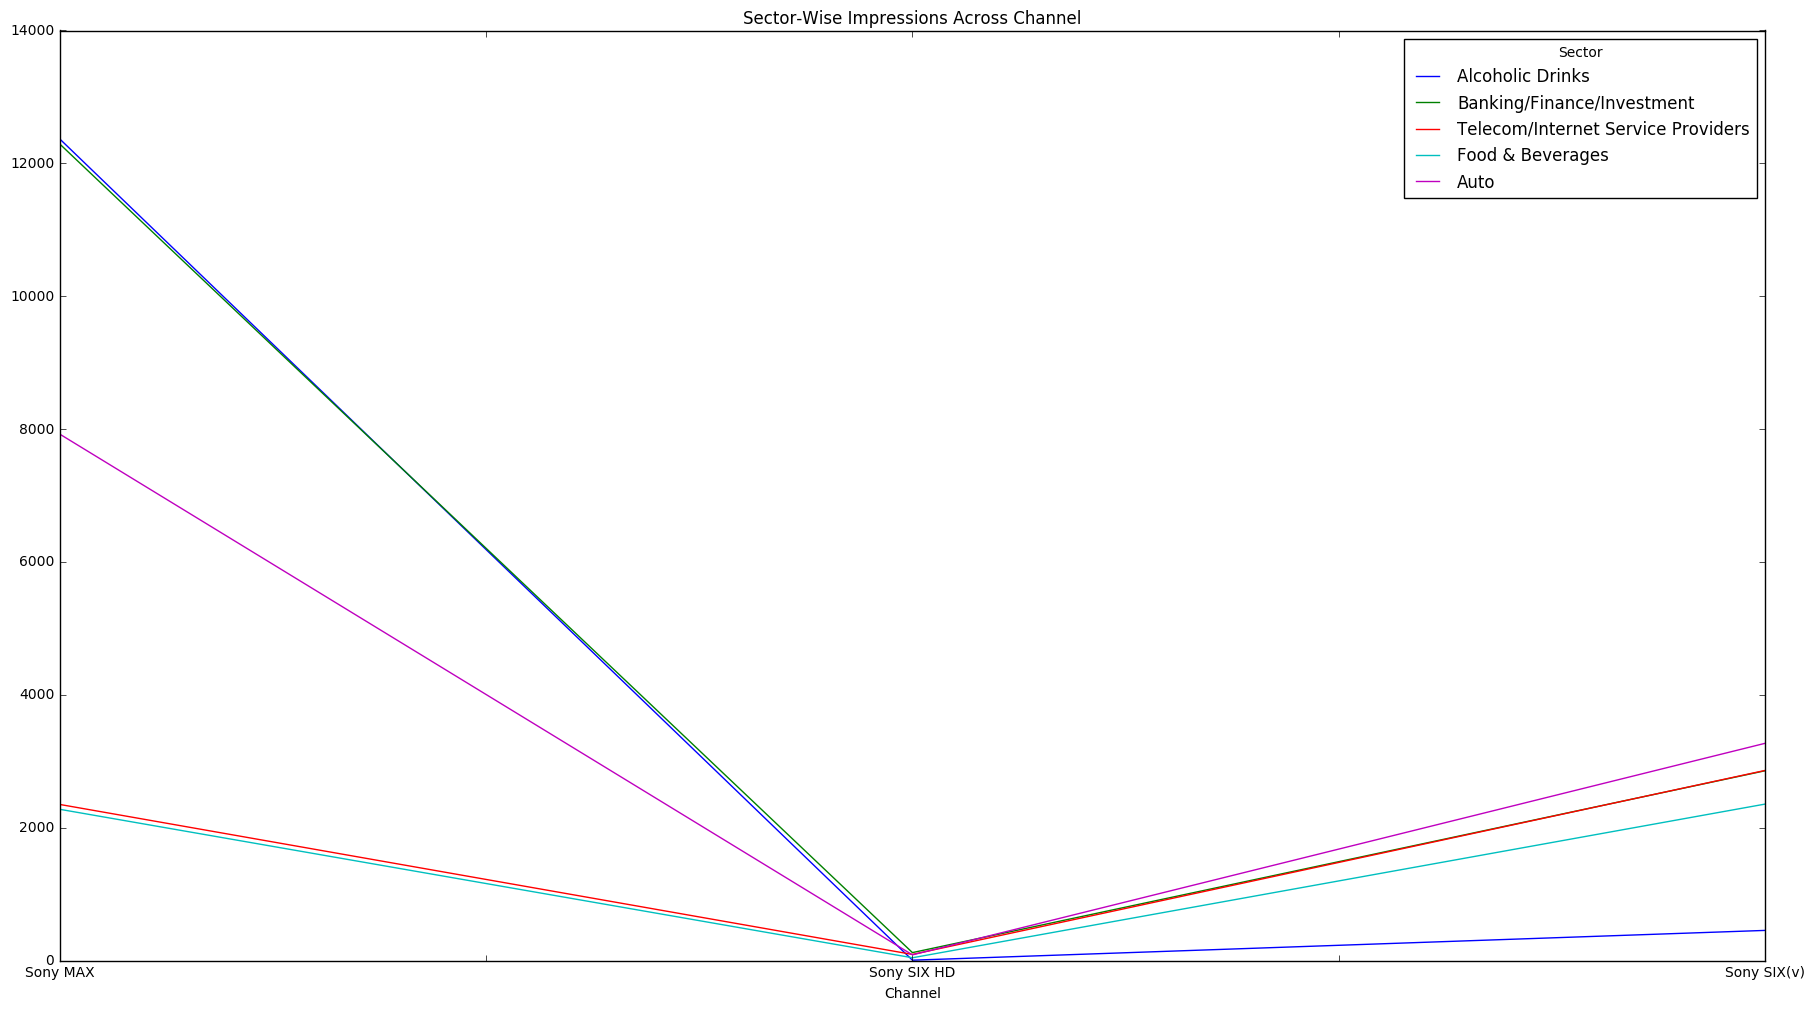

In [397]:
# company spends
ipl_tel_grp_p = impressions_by_sector_across_channels_table[["Alcoholic Drinks","Banking/Finance/Investment","Telecom/Internet Service Providers","Food & Beverages","Auto"]].plot(title = 'Sector-Wise Impressions Across Channel')
ipl_tel_grp_p = ipl_tel_grp_p.get_figure()
ipl_tel_grp_p.set_size_inches(22, 12)

In [ ]:
impressions_vs_length = pd.pivot_table(ipl_data, values='Impressions', index=['Channel'],columns=['Length [sec] {Av}'], aggfunc=np.median)
round(impressions_vs_length,2)

In [398]:
round(ipl_data.corr(),2)

,Month,Length [sec] {Av},Impressions,Rate/10 Sec,Cost
Month,1.00,-0.06,-0.04,NaN,-0.06
Length [sec] {Av},-0.06,1.00,-0.04,NaN,1.00
Impressions,-0.04,-0.04,1.00,NaN,-0.04
Rate/10 Sec,NaN,NaN,NaN,NaN,NaN
Cost,-0.06,1.00,-0.04,NaN,1.00


In [399]:

sectorwise_data=ipl_data.groupby('Sector').Impressions.mean()
print(sectorwise_data.sort_values(ascending=False).head(10))
sectorwise_data.sort_values(ascending=False).tail(10)


Sector
Personal Accessories                                5799.495676
Telecom Products                                    4552.294885
Auto                                                4237.403729
Building, Industrial & Land Materials/Equipments    4103.338717
Food & Beverages                                    3368.243713
Telecom/Internet Service Providers                  3341.628117
Services                                            3311.934345
Textiles/Clothing                                   2756.636138
Banking/Finance/Investment                          2729.126342
Durables                                            2627.378888
Name: Impressions, dtype: float64


Sector
Alcoholic Drinks                  1326.013103
Personal Care/Personal Hygiene    1292.736245
Corporate/Brand Image             1273.590445
Laundry                           1000.428687
Hair Care                          728.616023
Personal Healthcare                636.194911
Miscellaneous                      531.768469
Cosmetics                          472.266000
Education                          412.583067
Retail                             189.798114
Name: Impressions, dtype: float64

In [400]:
brandwise_data=ipl_data.groupby('Brand').Impressions.mean()
print(brandwise_data.sort_values(ascending=False).head(10))
brandwise_data.sort_values(ascending=False).tail(10)

Brand
PIRATES OF THE CARIBBEAN SALAZARS REVENG    16037.155000
KERALA TOURISM                              13260.870000
LEWIS BERGER EXPRESS PAINTING                9566.124000
PEPSI                                        9292.339310
LEWIS BERGER WEATHERCOAT ANTI DUST PAINT     9260.749863
TVS SPORT                                    8799.607862
NEROLAC IMPRESSION HD COLOR                  8729.047016
DOLLAR CLUB BIG BOSS                         8579.701686
SPORTO                                       8577.734110
VKC WALKAROO                                 8387.589615
Name: Impressions, dtype: float64


Brand
DR FIXIT PIDIPROOF LW PLUS/PIDICRETE URP    134.549667
SAMSUNG QLED TV                             132.916882
LLOYD AC                                    130.013242
NIVEA MEN BODY DEODORIZER                   128.640127
CB-DR FIXIT WATERPROOFING-BAHUBALI 2        126.328750
NIVEA MEN DARK SPOT REDUCTION CREME         117.163036
LLOYD LED TV                                116.959091
KARA SKINCARE WIPES                         114.405000
SACHIN A BILLION DREAMS                     103.791714
TASTY TREAT BHUJIA                           80.324000
Name: Impressions, dtype: float64

In [401]:
advertiserwise_data=ipl_data.groupby('Advertiser').Impressions.mean()
print(advertiserwise_data.sort_values(ascending=False).head(10))
advertiserwise_data.sort_values(ascending=False).tail(10)

Advertiser
WALT DISNEY STUDIOS MOTION PICTURES    16037.155000
KERALA TOURISM DEVP CORP               13260.870000
PEPSI CO                                9292.339310
BERGER PAINTS                           9167.781788
KANSAI NEROLAC PAINTS LTD               8514.219194
DOLLAR INDUSTRIES LTD                   8326.251258
GILLETTE INDIA LTD                      7782.741419
VEEKESY RUBBER INDUSTRIES               7519.209965
J G HOSIERY (P) LTD                     7447.945455
HITACHI HOME & LIFE SOLUTIONS           6860.618755
Name: Impressions, dtype: float64


Advertiser
PANASONIC INDIA PVT LTD                143.104197
HONDA CARS INDIA LTD                   139.618099
KAJARIA CERAMICS LTD                   137.668792
HERO CYCLES LTD                        137.027581
PIDILITE INDUSTRIES                    131.690217
LLOYD ELECTRIC & ENGG LTD              130.804796
NIVEA INDIA PVT LTD                    123.879259
FUTURE CORPORATE RESOURCES LTD         114.405000
200 NOT OUT CINEMAS PRIVATE LIMITED    103.791714
FUTURE CONSUMER ENTERPRISE LTD          94.133333
Name: Impressions, dtype: float64

In [402]:
advertiserwise_data=ipl_data.groupby('Advertiser').Impressions.mean()
print(advertiserwise_data.sort_values(ascending=False).head(10))
#plt.title("Advertiser Vs Impressions")
advertiserwise_data=ipl_data.groupby('Advertiser').Impressions.mean()
advertiserwise_data.sort_values(ascending=False).tail(10)

Advertiser
WALT DISNEY STUDIOS MOTION PICTURES    16037.155000
KERALA TOURISM DEVP CORP               13260.870000
PEPSI CO                                9292.339310
BERGER PAINTS                           9167.781788
KANSAI NEROLAC PAINTS LTD               8514.219194
DOLLAR INDUSTRIES LTD                   8326.251258
GILLETTE INDIA LTD                      7782.741419
VEEKESY RUBBER INDUSTRIES               7519.209965
J G HOSIERY (P) LTD                     7447.945455
HITACHI HOME & LIFE SOLUTIONS           6860.618755
Name: Impressions, dtype: float64


Advertiser
PANASONIC INDIA PVT LTD                143.104197
HONDA CARS INDIA LTD                   139.618099
KAJARIA CERAMICS LTD                   137.668792
HERO CYCLES LTD                        137.027581
PIDILITE INDUSTRIES                    131.690217
LLOYD ELECTRIC & ENGG LTD              130.804796
NIVEA INDIA PVT LTD                    123.879259
FUTURE CORPORATE RESOURCES LTD         114.405000
200 NOT OUT CINEMAS PRIVATE LIMITED    103.791714
FUTURE CONSUMER ENTERPRISE LTD          94.133333
Name: Impressions, dtype: float64

In [82]:
start_time_data=ipl_data.groupby('Start Time {Av(Tm)}').Impressions.mean()
print(start_time_data.sort_values(ascending=False).head(10))
start_time_data.sort_values(ascending=False).tail(10)


Start Time {Av(Tm)}
2017-08-17 23:20:56    24483.90
2017-08-17 23:20:06    23831.78
2017-08-17 23:20:46    23831.78
2017-08-17 23:20:21    23831.78
2017-08-17 21:34:09    23305.14
2017-08-17 21:25:36    22592.88
2017-08-17 21:43:25    22379.55
2017-08-17 20:40:25    22303.00
2017-08-17 20:40:05    22303.00
2017-08-17 21:43:45    22103.94
Name: Impressions, dtype: float64


Start Time {Av(Tm)}
2017-08-17 23:43:58    0.0
2017-08-17 12:10:39    0.0
2017-08-17 00:23:20    0.0
2017-08-17 17:59:21    0.0
2017-08-17 20:06:10    0.0
2017-08-17 17:59:23    0.0
2017-08-17 12:10:59    0.0
2017-08-17 12:11:00    0.0
2017-08-17 12:11:19    0.0
2017-08-17 02:13:43    0.0
Name: Impressions, dtype: float64

In [83]:
ipl_data['Start Time {Av(Tm)}']=pd.to_datetime(ipl_data['Start Time {Av(Tm)}'])
type(ipl_data['Start Time {Av(Tm)}'].dt)

pandas.tseries.common.DatetimeProperties

In [84]:
ipl_data['hour']=ipl_data['Start Time {Av(Tm)}'].dt.hour

In [85]:
ipl_data['hour'].head(5)

Date
2017-05-04    18
2017-05-04    18
2017-05-04    18
2017-05-04    18
2017-05-04    18
Name: hour, dtype: int64

In [72]:
hourwise_data=ipl_data.groupby('hour').Impressions.mean()
hourwise_data.sort_values(ascending=False).tail(10)

hour
14    314.832859
11    277.530779
12    243.095000
13    231.620837
1     202.945545
10    193.072524
2     108.744565
5     100.331071
3      78.404287
4      37.841328
Name: Impressions, dtype: float64

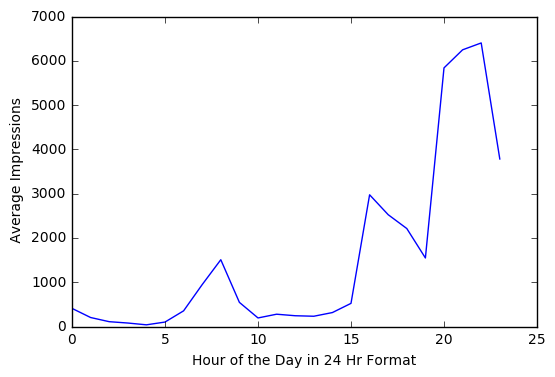

In [86]:
plt.plot(hourwise_data)
plt.ylabel(' Average Impressions')
plt.xlabel('Hour of the Day in 24 Hr Format')
plt.show()